# importing modules

In [1]:
import pandas as pd #for importing dataset
import numpy as np # for doing mathematical operations
import seaborn as sns # 
import matplotlib.pyplot as plt # for visualizing
from sklearn.model_selection import train_test_split # to break dataset for training and testing
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report # to generate classification report
import re  # for data cleaning
import string  # to deal with text data

# Reading two data files

In [2]:
df_fake=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv")

# Printing top 10 values from both dataset

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [6]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


# adding column name "class" in both dataset

In [7]:
df_fake["class"]=0
df_true["class"]=1

In [8]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [9]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# checking size of dataset

In [10]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [11]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [12]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [13]:
df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [14]:
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

# Taking last 10 values for manual testing from both datasets

In [15]:
data_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis=0, inplace=True)
    
    
data_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis=0, inplace=True)

In [16]:
df_fake.shape,df_true.shape  # 10 rows are deleted from each of dataset

((23471, 5), (21407, 5))

In [17]:
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

C:\Users\rajku\AppData\Local\Temp\ipykernel_7520\4042680642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = 0
C:\Users\rajku\AppData\Local\Temp\ipykernel_7520\4042680642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = 1


In [18]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [19]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


# merging these two datases in single dataframe

In [20]:
data_merge = pd.concat([df_fake,df_true],axis = 0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [21]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# removing 3 columns from dataset

In [22]:
data = data_merge.drop(['title','subject','date'],axis=1) 

In [23]:
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


# checking for null values in dataset

In [24]:
data.isnull().sum()

text     0
class    0
dtype: int64

# creating data filtering function to remove unwanted data from text

In [25]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.\s+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [26]:
data['text'] = data['text'].apply(filtering)

In [27]:
data

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0
...,...,...
21402,on board a u s military aircraft reuters ...,1
21403,washington reuters the united states sugge...,1
21404,washington reuters the united states has d...,1
21405,islamabad reuters outlining a new strategy...,1


# shuffling the dataset for better prediction

In [28]:
data = data.sample(frac = 1)   # this show the random number of dataset
data.head(10)

,text,class
18681,kabul reuters islamic state claimed respon...,1
20270,translation i m so sorry for your loss but wa...,0
19445,monica crowley conservative radio host fox n...,0
5545,a seven year old alma michigan boy accidental...,0
10837,washington reuters the death of justice an...,1
19900,punishment is not for revenge but to lessen ...,0
16630,washington reuters u s government officia...,1
5055,brian stelter just called out sean hannity dur...,0
2414,republicans should be ashamed of themselves an...,0
8904,washington reuters a u s report on the nu...,1


# performing some basic data visualization

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


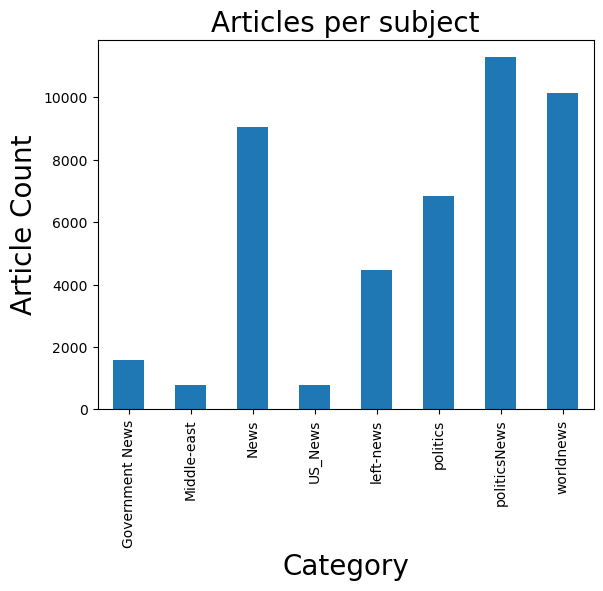

In [29]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind='bar')
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article Count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0=Fake news
1 = True news


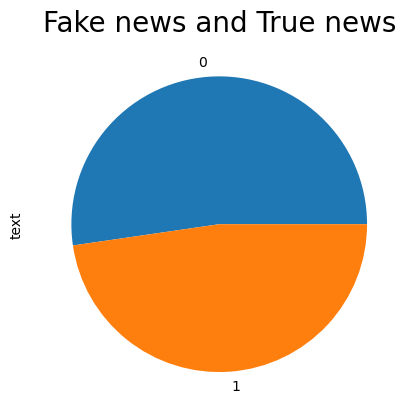

In [30]:
print(data_merge.groupby(['class'])['text'].count())
print("0=Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind='pie')
plt.title('Fake news and True news',size=20)
plt.show()

#     Creating Dependent and independant variables

In [31]:
x = data["text"]
y = data['class']

# splitting dataset for training and testing purpose

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

# Vectorizing the text

The sklearn,feature extraction module is used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer() 
xv_train = vector.fit_transform(x_train)
xv_test = vector.transform(x_test)

# Classification using various classifers

# logistic regression 

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr = LR.predict(xv_test)

In [36]:
LR.score(xv_test,y_test)  # check the accuracy

0.9873440285204991

In [37]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5927
           1       0.98      0.99      0.99      5293

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# creating confusion matrix

The matrix consists of predictions result in summarized form, which has a total number of correct predictions and incorrect predictions

[[5846   81]
 [  61 5232]]


<AxesSubplot:>

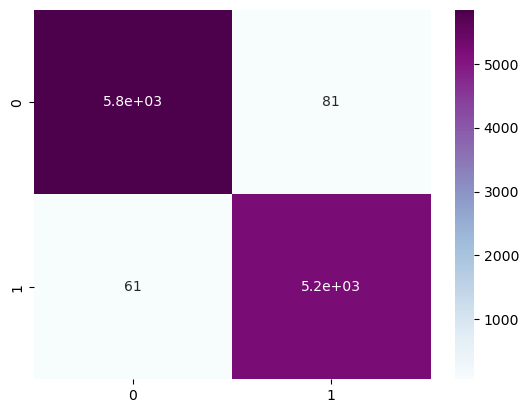

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_lr)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

# Decision tree classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [40]:
pred_dt = DT.predict(xv_test)

In [41]:
DT.score(xv_test,y_test)

0.996524064171123

In [42]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5927
           1       1.00      1.00      1.00      5293

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5912   15]
 [  24 5269]]


<AxesSubplot:>

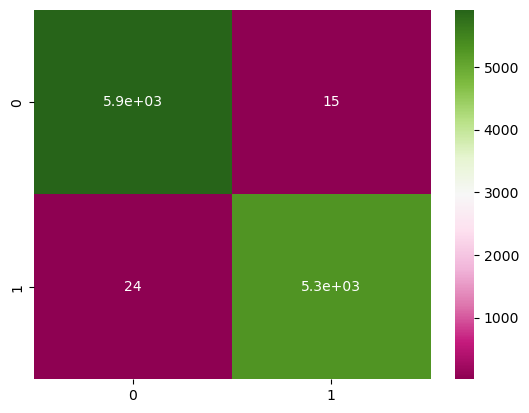

In [43]:
cm = confusion_matrix(y_test,pred_dt)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

# Random forest classifier  

supervised machine learning algorithms used for classification,regression and other tasks using decision trees

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)  

RandomForestClassifier(random_state=0)

In [45]:
pred_rf = RFC.predict(xv_test)

In [46]:
RFC.score(xv_test,y_test)

0.9875222816399287

In [47]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5927
           1       0.99      0.99      0.99      5293

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5859   68]
 [  72 5221]]


<AxesSubplot:>

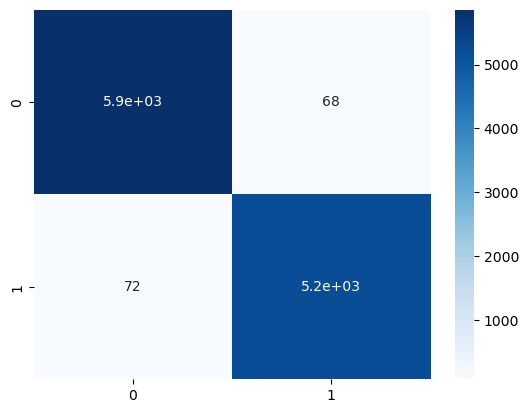

In [48]:
cm = confusion_matrix(y_test,pred_rf)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

# Gradient boosting classifier

it is a group of machine learning algorthms that combine many weak learning models together to create a strong predictive model

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)  

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gb = GBC.predict(xv_test)

In [51]:
GBC.score(xv_test,y_test)

0.9957219251336898

In [52]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5927
           1       0.99      1.00      1.00      5293

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5896   31]
 [  17 5276]]


<AxesSubplot:>

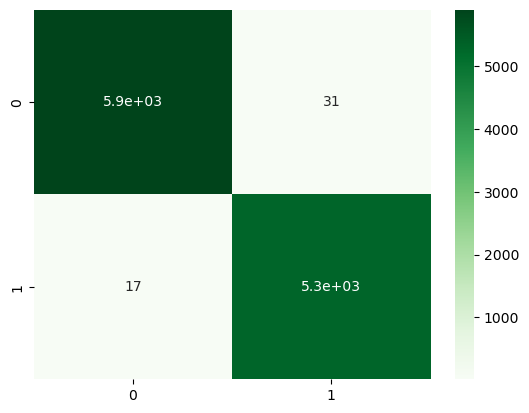

In [53]:
cm = confusion_matrix(y_test,pred_gb)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)

# CONCLUSION



In [54]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}" . format(output_label(pred_LR[0]),
                output_label(pred_DT[0]),
                output_label(pred_GBC[0]),
                output_label(pred_RFC[0])))
        

In [55]:
news = str(input())
manual_testing(news)

donald trump just couldn t wish all americans


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [56]:
news = str(input())
manual_testing(news)

washington reuters the death of justice an


LR Prediction: True News 
DT Prediction: True News 
GBC Prediction: True News 
RFC Prediction: Fake News
